# Unit 3 Lesson 5 Project 1

In [1]:
# Analysis of Regents exam scores in the NYC school system (2015-2017)

In [2]:
# Software packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #viz
import matplotlib.pyplot as plt #viz
%matplotlib inline
sns.set(color_codes=True)

In [4]:
# Read in the dataset and make a list of missing (non-standard) values

In [5]:
missing_values = ["na", "s"]

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',na_values = missing_values)

In [7]:
df.head(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN


In [8]:
df.tail(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore the dataset characteristics

In [9]:
df.dtypes

School DBN                      object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65        float64
Percent Scoring Below 65       float64
Number Scoring 65 or Above     float64
Percent Scoring 65 or Above    float64
Number Scoring 80 or Above     float64
Percent Scoring 80 or Above    float64
Number Scoring CR              float64
Percent Scoring CR             float64
dtype: object

In [10]:
df.shape

(212331, 15)

In [11]:
# Summary statistics before testing for duplicates

In [12]:
df.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331.000000,212331.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,69651.000000,69651.000000
mean,2015.956069,49.364200,65.998967,25.140297,41.933632,46.443516,58.067855,20.506655,22.692027,29.959340,36.213730
std,0.799726,93.023576,11.288883,37.155199,28.405737,85.187123,28.405517,56.301578,26.160987,68.306798,31.092605
min,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,5.000000,58.300000,5.000000,17.500000,8.000000,36.000000,1.000000,2.200000,2.000000,8.800000
50%,2016.000000,20.000000,65.400000,13.000000,40.200000,21.000000,59.800000,5.000000,12.500000,9.000000,29.000000
75%,2017.000000,57.000000,73.400000,31.000000,64.000000,52.000000,82.500000,18.000000,34.500000,31.000000,58.800000
max,2017.000000,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000,1465.000000,100.000000


In [13]:
# Determine the number of duplicate rows

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape)

number of duplicate rows:  (23819, 15)


In [15]:
# Remove duplicate rows

In [16]:
df = df.drop_duplicates()

In [17]:
# Count after dropping duplicates

In [18]:
df.count()

School DBN                     188512
School Name                    188512
School Level                   188512
Regents Exam                   188502
Year                           188512
Total Tested                   188512
Mean Score                     133531
Number Scoring Below 65        133531
Percent Scoring Below 65       133531
Number Scoring 65 or Above     133531
Percent Scoring 65 or Above    133531
Number Scoring 80 or Above     133531
Percent Scoring 80 or Above    133531
Number Scoring CR               67610
Percent Scoring CR              67610
dtype: int64

In [19]:
# Identify null values from the dataset, then remove them

In [20]:
print(df.isnull().sum())

School DBN                          0
School Name                         0
School Level                        0
Regents Exam                       10
Year                                0
Total Tested                        0
Mean Score                      54981
Number Scoring Below 65         54981
Percent Scoring Below 65        54981
Number Scoring 65 or Above      54981
Percent Scoring 65 or Above     54981
Number Scoring 80 or Above      54981
Percent Scoring 80 or Above     54981
Number Scoring CR              120902
Percent Scoring CR             120902
dtype: int64


In [21]:
df = df.dropna()

In [22]:
print(df.isnull().sum())

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64


In [23]:
# Unique values

In [24]:
df.nunique()

School DBN                     941
School Name                    935
School Level                     5
Regents Exam                     8
Year                             3
Total Tested                   952
Mean Score                     725
Number Scoring Below 65        406
Percent Scoring Below 65       990
Number Scoring 65 or Above     802
Percent Scoring 65 or Above    990
Number Scoring 80 or Above     586
Percent Scoring 80 or Above    996
Number Scoring CR              706
Percent Scoring CR             998
dtype: int64

In [25]:
# Summary statistics after dropping duplicates and null values

In [26]:
df.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000
mean,2015.898006,69.494601,65.033211,24.962368,43.146803,44.532233,56.854735,17.854279,20.096305,30.360256,36.128675
std,0.799492,106.637434,11.229314,38.038172,29.350178,83.889913,29.349966,53.002063,25.575245,69.113377,30.907601
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,17.000000,57.500000,5.000000,17.900000,7.000000,33.300000,0.000000,0.000000,2.000000,9.100000
50%,2016.000000,37.000000,64.700000,12.000000,41.000000,19.000000,59.000000,3.000000,9.100000,9.000000,29.000000
75%,2017.000000,79.000000,72.400000,30.000000,66.700000,50.000000,82.100000,14.000000,30.300000,31.000000,58.400000
max,2017.000000,1554.000000,98.300000,697.000000,100.000000,1497.000000,100.000000,1318.000000,100.000000,1465.000000,100.000000


In [27]:
df['Year'].value_counts()

2015    25404
2016    23689
2017    18509
Name: Year, dtype: int64

In [28]:
df['School Level'].value_counts()

High school                        50437
Secondary School                    9452
Junior High-Intermediate-Middle     3657
K-12 all grades                     2627
K-8                                 1429
Name: School Level, dtype: int64

In [29]:
df['Regents Exam'].value_counts()

Common Core Algebra      18948
Common Core English      13169
Common Core Geometry      9326
English                   6682
Integrated Algebra        6178
Algebra2/Trigonometry     5013
Geometry                  4176
Common Core Algebra2      4110
Name: Regents Exam, dtype: int64

In [30]:
# Select columns

In [31]:
df2=df[['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score','Number Scoring Below 65','Number Scoring 65 or Above','Number Scoring 80 or Above']]

In [32]:
df2.head(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,48.0,23.0
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,42.0,33.0


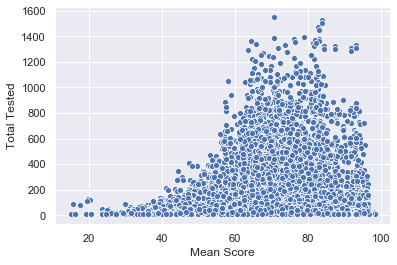

In [33]:
sns.scatterplot(x='Mean Score',y='Total Tested',data=df)

# Bronx records

In [34]:
dfb = df2[df2['School DBN'].str.contains('X')]

In [35]:
dfb.head(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
3923,07X029,P.S./M.S. 029 Melrose School,K-8,Common Core Algebra,2015,29,65.0,12.0,17.0,0.0
3924,07X029,P.S./M.S. 029 Melrose School,K-8,Common Core Algebra,2016,29,66.5,11.0,18.0,2.0


In [36]:
dfb.tail(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87.0,0.0,6.0,6.0
212323,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,88.3,0.0,6.0,5.0


In [37]:
# drop School DBN column

In [38]:
dfb = dfb.drop('School DBN',1)

In [39]:
dfb.head(2)

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
3923,P.S./M.S. 029 Melrose School,K-8,Common Core Algebra,2015,29,65.0,12.0,17.0,0.0
3924,P.S./M.S. 029 Melrose School,K-8,Common Core Algebra,2016,29,66.5,11.0,18.0,2.0


In [40]:
dfb.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
count,17211.000000,17211.00000,17211.000000,17211.000000,17211.000000,17211.000000
mean,2015.879554,48.98960,62.189547,21.606821,27.382778,8.945500
std,0.796102,57.30003,10.287001,24.756002,45.277722,33.525646
min,2015.000000,6.00000,16.100000,0.000000,0.000000,0.000000
25%,2015.000000,16.00000,55.500000,7.000000,5.000000,0.000000
50%,2016.000000,32.00000,62.000000,14.000000,14.000000,2.000000
75%,2017.000000,65.00000,68.800000,28.000000,36.000000,8.000000
max,2017.000000,834.00000,96.600000,496.000000,787.000000,774.000000


In [41]:
dfb.nunique()

School Name                   230
School Level                    5
Regents Exam                    8
Year                            3
Total Tested                  361
Mean Score                    660
Number Scoring Below 65       196
Number Scoring 65 or Above    280
Number Scoring 80 or Above    195
dtype: int64

In [42]:
dfb['Year'].value_counts()

2015    6615
2016    6054
2017    4542
Name: Year, dtype: int64

In [43]:
# There are scores available for only 8 of 14 possible Regents exams for schools at all school levels in the Bronx

In [44]:
dfb['Regents Exam'].value_counts()

Common Core Algebra      4656
Common Core English      3533
Common Core Geometry     2189
English                  1910
Integrated Algebra       1798
Algebra2/Trigonometry    1144
Geometry                 1056
Common Core Algebra2      925
Name: Regents Exam, dtype: int64

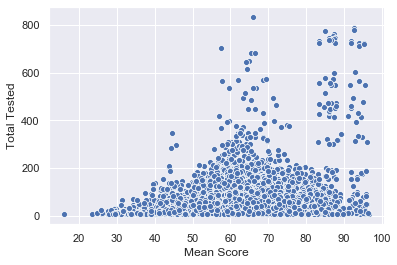

In [45]:
sns.scatterplot(x='Mean Score',y='Total Tested',data=dfb)

# Specific school records

In [46]:
dfs = df2[df2['School Name']== 'Kennedy Yabc']

In [47]:
dfs.head(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
5854,10X504,Kennedy Yabc,High school,Common Core Algebra,2016,7,55.7,6.0,1.0,0.0
6928,10X504,Kennedy Yabc,High school,Common Core Algebra,2017,19,54.9,15.0,4.0,0.0


In [48]:
dfs.tail(2)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above
165756,10X504,Kennedy Yabc,High school,English,2016,7,42.7,7.0,0.0,0.0
165757,10X504,Kennedy Yabc,High school,English,2016,25,43.7,23.0,2.0,0.0


In [49]:
# Drop unneeded columns

In [50]:
dfs.count()

School DBN                    46
School Name                   46
School Level                  46
Regents Exam                  46
Year                          46
Total Tested                  46
Mean Score                    46
Number Scoring Below 65       46
Number Scoring 65 or Above    46
Number Scoring 80 or Above    46
dtype: int64

In [51]:
dfs.mean()

Year                          2016.021739
Total Tested                    18.847826
Mean Score                      49.956522
Number Scoring Below 65         14.673913
Number Scoring 65 or Above       4.173913
Number Scoring 80 or Above       0.304348
dtype: float64

In [52]:
dfs.min()

School DBN                                 10X504
School Name                          Kennedy Yabc
School Level                          High school
Regents Exam                  Common Core Algebra
Year                                         2015
Total Tested                                    6
Mean Score                                   37.2
Number Scoring Below 65                         5
Number Scoring 65 or Above                      0
Number Scoring 80 or Above                      0
dtype: object

In [53]:
dfs.max()

School DBN                                10X504
School Name                         Kennedy Yabc
School Level                         High school
Regents Exam                  Integrated Algebra
Year                                        2017
Total Tested                                  70
Mean Score                                  60.1
Number Scoring Below 65                       47
Number Scoring 65 or Above                    23
Number Scoring 80 or Above                     2
dtype: object

In [54]:
# There are scores available for only 4 of 14 of the Regents exams for 
# Kennedy

In [55]:
dfs['Regents Exam'].value_counts()

English                20
Common Core English    12
Common Core Algebra     9
Integrated Algebra      5
Name: Regents Exam, dtype: int64

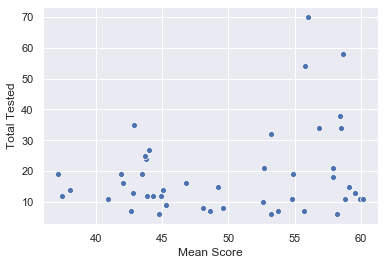

In [56]:
sns.scatterplot(x='Mean Score',y='Total Tested',data=dfs)

# Analysis

In [57]:
# Mean exam scores are lower at Kennedy than they are in the rest of the
# Bronx and citywide

# df-citywide, dfb-Bronx, dfs-Kennedy

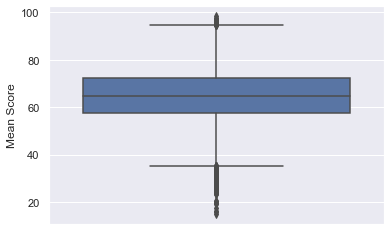

In [58]:
sns.boxplot(y=df['Mean Score'])

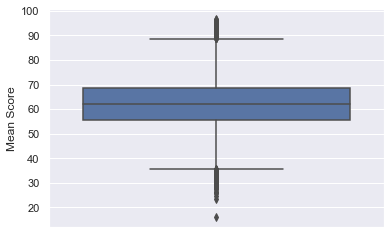

In [59]:
sns.boxplot(y=dfb['Mean Score'])

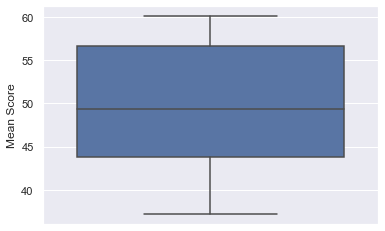

In [60]:
sns.boxplot(y=dfs['Mean Score'])

In [61]:
# Citywide, mean scores for Common Core English have a wide distribution
# and are very low (below 50) at Kennedy. Note that the sample size for 
# Kennedy is very small(46 records).

# df-citywide, dfb-Bronx, dfs-Kennedy

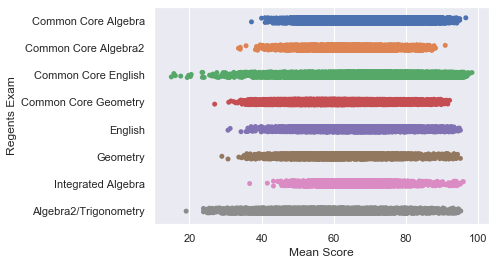

In [62]:
sns.stripplot(x="Mean Score",y="Regents Exam",data=df)

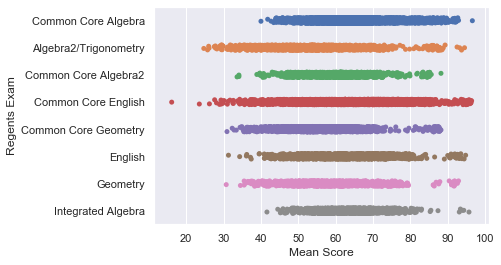

In [63]:
sns.stripplot(x="Mean Score",y="Regents Exam",data=dfb)

In [64]:
# Mean scores for math exams are notably higher then language (English)
# at Kennedy

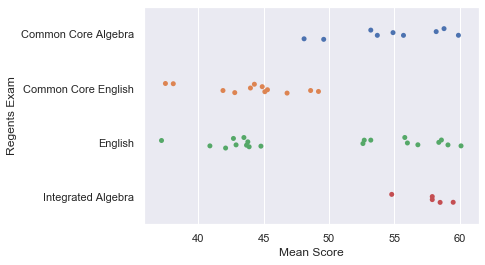

In [65]:
sns.stripplot(x="Mean Score",y="Regents Exam",data=dfs)

In [66]:
# Mean scores are much more evenly distributed citywide and in the Bronx,
# following a bell-shaped curve. 

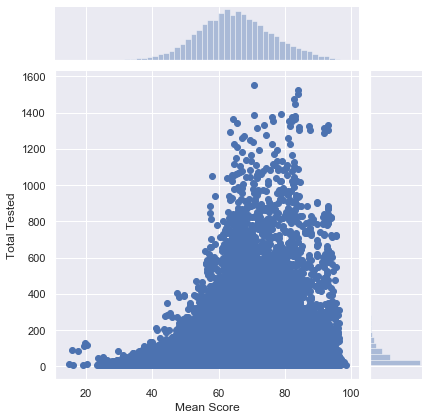

In [67]:
sns.jointplot(x='Mean Score',y='Total Tested',data=df)

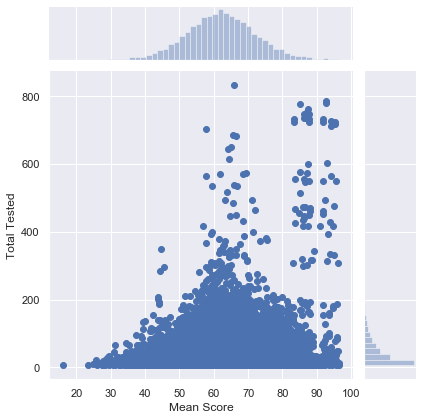

In [68]:
sns.jointplot(x='Mean Score',y='Total Tested',data=dfb)

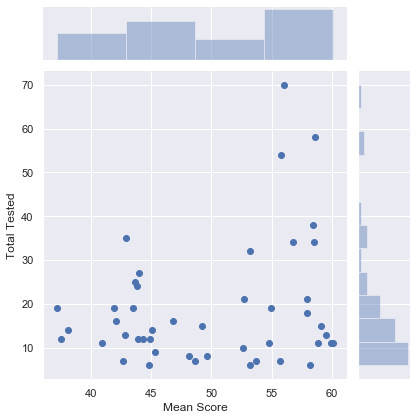

In [69]:
sns.jointplot(x='Mean Score',y='Total Tested',data=dfs)